In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb

2023-03-30 09:39:54.598380: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-30 09:39:55.065587: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/maven/3.6.3/lib
2023-03-30 09:39:55.065598: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
mnist= tf.keras.datasets.mnist
(train_images,train_labels) , (test_images,test_labels)=mnist.load_data()

In [3]:
temp=[]
for i in range(len(train_images)):
    (x,y) = (random.randint(0,28),random.randint(0,28))
    temp_img= np.array([[ 0 for i in range(56)] for j in range(56)]) 
    temp_img[x:x+28 , y:y+28] += train_images[i]
    temp.append(temp_img)
    
train_images=np.array(temp)
print('train_images.shape : ',train_images.shape)
train_images = train_images.reshape((60000,56,56,1))
train_images = train_images/255

train_images.shape :  (60000, 56, 56)


In [4]:
temp=[]
for i in range(len(test_images)):
    (x,y) = (random.randint(0,28),random.randint(0,28))
    temp_img= np.array([[ 0 for i in range(56)] for j in range(56)]) 
    temp_img[x:x+28 , y:y+28] += test_images[i]
    temp.append(temp_img)
    
test_images=np.array(temp)
print('test_images.shape : ',test_images.shape)
test_images = test_images.reshape((10000,56,56,1))
test_images = test_images/255

test_images.shape :  (10000, 56, 56)


In [30]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(56,56,1)))
model.add(tf.keras.layers.Dense(64,activation= 'relu'))
model.add(tf.keras.layers.Dense(10))


model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                200768    
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 201,418
Trainable params: 201,418
Non-trainable params: 0
_________________________________________________________________


In [31]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']
epochs=10
batchSize=64

model.compile(loss=loss,optimizer=optim,metrics=metrics)
model.fit(train_images,train_labels,batch_size=batchSize,epochs=epochs,shuffle=True)



Epoch 1/10
938/938 [==============================] - 1s 593us/step - loss: 1.5327 - accuracy: 0.4945
Epoch 2/10
938/938 [==============================] - 1s 582us/step - loss: 0.8094 - accuracy: 0.7552
Epoch 3/10
938/938 [==============================] - 1s 571us/step - loss: 0.6109 - accuracy: 0.8165
Epoch 4/10
938/938 [==============================] - 1s 578us/step - loss: 0.5113 - accuracy: 0.8474
Epoch 5/10
938/938 [==============================] - 1s 582us/step - loss: 0.4503 - accuracy: 0.8643
Epoch 6/10
938/938 [==============================] - 1s 592us/step - loss: 0.4074 - accuracy: 0.8780
Epoch 7/10
938/938 [==============================] - 1s 596us/step - loss: 0.3660 - accuracy: 0.8909
Epoch 8/10
938/938 [==============================] - 1s 623us/step - loss: 0.3397 - accuracy: 0.8984
Epoch 9/10
938/938 [==============================] - 1s 585us/step - loss: 0.3102 - accuracy: 0.9079
Epoch 10/10
938/938 [==============================] - 1s 585us/step - loss: 0.286

Prediction :  6


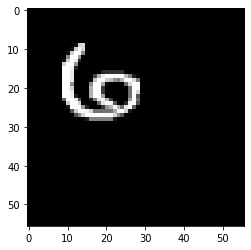

In [33]:
pred_model=tf.keras.models.Sequential()
pred_model.add(model)
pred_model.add(tf.keras.layers.Softmax())

cnt =random.randint(100)

predtions= pred_model(test_images)
pred=predtions[cnt]
label= np.argmax(pred)

# print pred + Image
plt.imshow(test_images[cnt],cmap='gray')
print("Prediction : ",label)



313/313 [==============================] - 0s 408us/step


<AxesSubplot:>

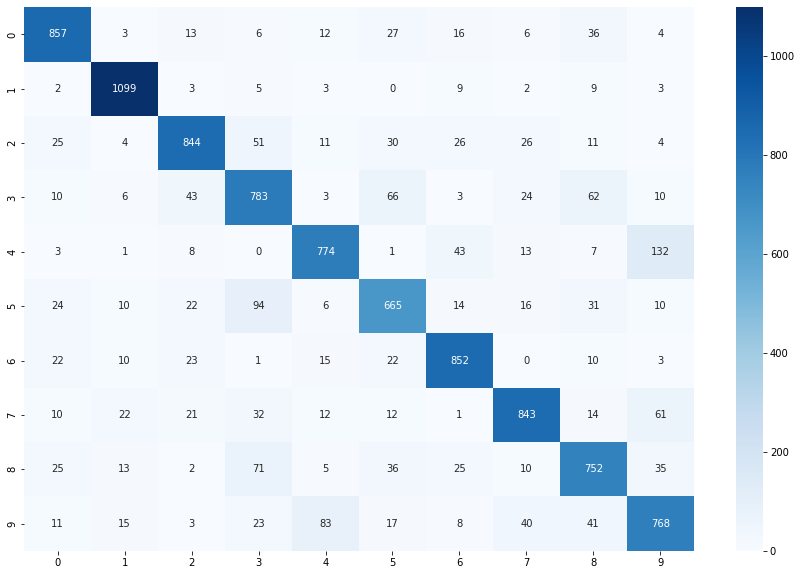

In [34]:
y_pred = np.argmax(pred_model.predict(test_images), axis=1)
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

conf_matrix = pd.DataFrame(confusion_matrix(test_labels, y_pred), columns=labels, index=labels)
plt.figure(figsize=(15,10))  
sb.heatmap(conf_matrix, annot=True, fmt="d",cmap="Blues")